5. Predicting Customer Satisfaction Using Logistic Regression
    
    Dataset:
    Customer Satisfaction Dataset

    Preprocessing Steps:

Handle missing values (e.g., fill missing values with median).

Encode categorical variables (e.g., one-hot encoding for region).

Standardize numerical features.


    Task:

Implement logistic regression to predict customer satisfaction and evaluate the model using accuracy and confusion matrix.


# Necessary Libraries


In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading dataset

In [23]:
file_path = '/content/Customer-survey-data.csv'
df = pd.read_csv(file_path)

In [24]:
df.head()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy
0,1,5.0,3.0,4.0,Yes
1,2,3.0,4.0,3.0,Yes
2,3,4.0,5.0,2.0,Yes
3,4,5.0,3.0,4.0,Yes
4,5,2.0,5.0,1.0,Yes


In [25]:
df.describe()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating)
count,10616.000000,10198.000000,10364.000000,10377.000000
mean,5308.500000,3.325260,3.332015,3.322926
std,3064.719563,1.419754,1.414709,1.408918
min,1.000000,1.000000,1.000000,1.000000
25%,2654.750000,2.000000,2.000000,2.000000
50%,5308.500000,3.000000,3.000000,3.000000
75%,7962.250000,5.000000,5.000000,5.000000
max,10616.000000,5.000000,5.000000,5.000000


In [26]:
df.tail()

,Customer ID,Overall Delivery Experience (Rating),Food Quality (Rating),Speed of Delivery (Rating),Order Accuracy
10611,10612,4.0,2.0,3.0,Yes
10612,10613,3.0,3.0,3.0,Yes
10613,10614,5.0,3.0,3.0,Yes
10614,10615,3.0,3.0,3.0,Yes
10615,10616,1.0,3.0,3.0,Yes


In [27]:
df['Order Accuracy'].value_counts()

Order Accuracy
Yes    7111
No     2845
Name: count, dtype: int64

In [10]:
# Dropping  unnecessary columns
df = df.drop(columns=['Customer ID'])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Customer ID                           10616 non-null  int64  
 1   Overall Delivery Experience (Rating)  10198 non-null  float64
 2   Food Quality (Rating)                 10364 non-null  float64
 3   Speed of Delivery (Rating)            10377 non-null  float64
 4   Order Accuracy                        9956 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 414.8+ KB


In [29]:
target_column = 'Overall Delivery Experience (Rating)'  # Exact name
categorical_feature = 'Order Accuracy'

In [30]:
df.isnull().sum()

Customer ID                               0
Overall Delivery Experience (Rating)    418
Food Quality (Rating)                   252
Speed of Delivery (Rating)              239
Order Accuracy                          660
dtype: int64

**There are null values lets impute it.**

# Handling missing Values

In [31]:
# Handle missing values for numerical features by filling with median
numerical_features = ['Food Quality (Rating)', 'Speed of Delivery (Rating)']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


# Encoding

In [32]:
# using One-hot encode for categorical feature 'Order Accuracy'
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Combining preprocess data

In [33]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, [categorical_feature])
    ])

In [34]:
# Separate features and target
# Separate features and target
X = df.drop(columns=[target_column])  # Features
y = df[target_column].apply(lambda x: 1 if x >= 4 else 0)  # Binary target

In [19]:
df.columns

Index(['Overall Delivery Experience (Rating)', 'Food Quality (Rating)',
       'Speed of Delivery (Rating)', 'Order Accuracy'],
      dtype='object')

In [35]:
# Apply preprocessing
X_preprocessed = preprocessor.fit_transform(X)

In [37]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.3, random_state=42)

# Model Training

In [38]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [39]:
# Make predictions
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.7161695447409733
Confusion Matrix:
[[1360  405]
 [ 499  921]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1765
           1       0.69      0.65      0.67      1420

    accuracy                           0.72      3185
   macro avg       0.71      0.71      0.71      3185
weighted avg       0.72      0.72      0.71      3185



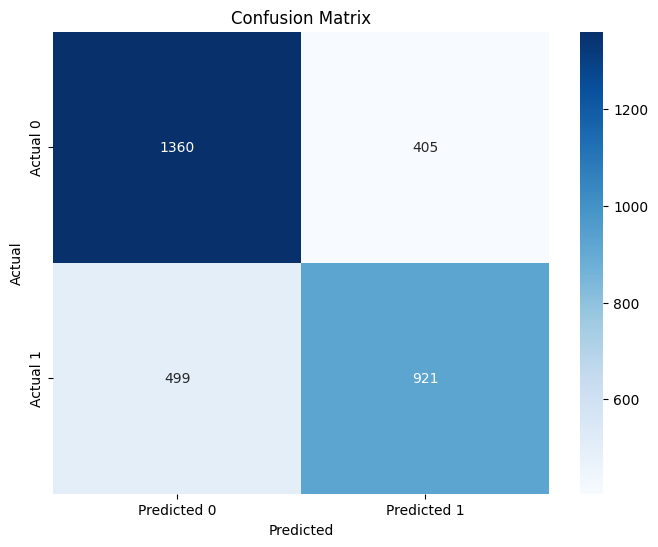

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
